In [367]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt

In [368]:
Bank = pd.read_csv("bank.csv", sep = ",")
Bank.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [369]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [370]:
#Bank.shape()
# Bank.isnull()
#print(Bank.dtypes)

In [371]:
Bank.groupby("deposit").size()

deposit
no     5873
yes    5289
dtype: int64

In [372]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [373]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.23,1528.54,15.66,371.99,2.51,51.33,0.83
std,11.91,3225.41,8.42,347.13,2.72,108.76,2.29
min,18.00,-6847.00,1.00,2.00,1.00,-1.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00
max,95.00,81204.00,31.00,3881.00,63.00,854.00,58.00


In [374]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
columns= [ "job",	"marital",	"education", "default",	"housing",	"loan",
"contact","month", 	"poutcome",	"deposit"] 
la = LabelEncoder()
for i in columns:
    Bank[i] = la.fit_transform(Bank[i])

Bank


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [375]:
#relationship 
from pandas import set_option
set_option('display.precision', 2)
Corr = Bank.corr(method = 'pearson')
print(Corr)

                age       job   marital  education   default   balance  \
age        1.00e+00 -3.16e-02 -4.43e-01  -1.26e-01 -1.14e-02  1.12e-01   
job       -3.16e-02  1.00e+00  7.83e-02   1.47e-01 -7.07e-03  2.87e-02   
marital   -4.43e-01  7.83e-02  1.00e+00   1.26e-01 -1.47e-02 -2.14e-03   
education -1.26e-01  1.47e-01  1.26e-01   1.00e+00 -1.07e-02  5.17e-02   
default   -1.14e-02 -7.07e-03 -1.47e-02  -1.07e-02  1.00e+00 -6.10e-02   
balance    1.12e-01  2.87e-02 -2.14e-03   5.17e-02 -6.10e-02  1.00e+00   
housing   -1.69e-01 -1.37e-01 -3.63e-02  -1.09e-01  1.11e-02 -7.71e-02   
loan      -3.14e-02 -6.71e-02 -6.20e-02  -7.32e-02  7.64e-02 -8.46e-02   
contact    2.78e-02 -8.79e-02 -6.05e-02  -1.33e-01  3.57e-02 -2.73e-02   
day       -7.62e-04  2.66e-02 -3.64e-03   1.68e-02  1.73e-02  1.05e-02   
month     -2.61e-02 -7.60e-02 -4.07e-03  -5.59e-02  9.50e-04  7.26e-03   
duration   1.89e-04  2.43e-03  6.78e-03  -1.91e-02 -9.76e-03  2.24e-02   
campaign  -5.28e-03  3.10e-03 -3.08e-0

In [376]:

Bank.skew()


age          0.86
job          0.18
marital     -0.17
education    0.12
default      7.97
balance      8.22
housing      0.11
loan         2.19
contact      1.18
day          0.11
month       -0.32
duration     2.14
campaign     5.55
pdays        2.45
previous     7.34
poutcome    -1.72
deposit      0.10
dtype: float64

age             Axes(0.125,0.653529;0.227941x0.226471)
job          Axes(0.398529,0.653529;0.227941x0.226471)
marital      Axes(0.672059,0.653529;0.227941x0.226471)
education       Axes(0.125,0.381765;0.227941x0.226471)
default      Axes(0.398529,0.381765;0.227941x0.226471)
balance      Axes(0.672059,0.381765;0.227941x0.226471)
housing             Axes(0.125,0.11;0.227941x0.226471)
loan             Axes(0.398529,0.11;0.227941x0.226471)
dtype: object

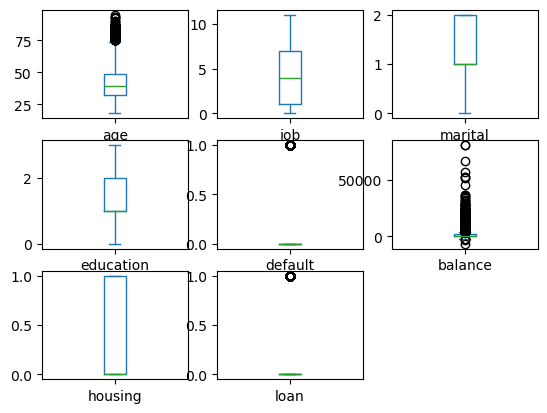

In [377]:
# Checking for outliers using boxplot
Features_name = ["age", "job",	"marital",	"education", "default",	"balance",	"housing",	"loan",]
from matplotlib import pyplot
Bank[Features_name].plot( kind= 'box',subplots = True, layout= (3,3),sharex = False, sharey= False)

contact        Axes(0.125,0.653529;0.227941x0.226471)
day         Axes(0.398529,0.653529;0.227941x0.226471)
month       Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
poutcome        Axes(0.398529,0.11;0.227941x0.226471)
deposit         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

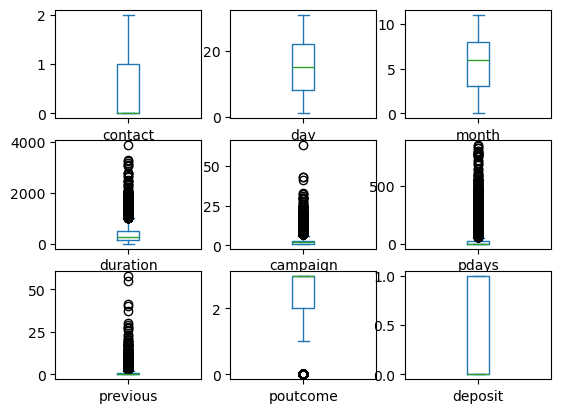

In [378]:
# Checking for outliers using boxplot
Features_name = ["contact",	"day",	"month", "duration", "campaign",	"pdays",	"previous",	"poutcome","deposit"]
from matplotlib import pyplot
Bank[Features_name].plot( kind= 'box',subplots = True, layout= (3,3),sharex = False, sharey= False)

In [379]:
#removing outliers balance
bank = Bank.copy()
Q1 = Bank["balance"].quantile(0.25)
Q3 = Bank["balance"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bank[(bank["balance"] <lower_bound) | (bank["balance"]>upper_bound)]
no_outliers = bank[(bank["balance"] <= lower_bound) & (bank["balance"]>=upper_bound)] 
bank["balance"] = bank["balance"].mask(bank["balance"]< lower_bound, lower_bound)
bank["balance"] = bank["balance"].mask(bank["balance"]> upper_bound, upper_bound)
#print("outliers")
#print(outliers)
#print("no_outliers") 
#print(no_outliers)

print ("Replaced Outliers")
print(bank)




Replaced Outliers
       age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       da

In [380]:
#removing outliers Age

Q1 = bank["age"].quantile(0.25)
Q3 = bank["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bank[(bank["age"] <lower_bound) | (bank["age"]>upper_bound)]
no_outliers = bank[(bank["age"] <= lower_bound) & (bank["age"]>=upper_bound)] 
bank["age"] = bank["age"].mask(bank["age"]< lower_bound, lower_bound)
bank["age"] = bank["age"].mask(bank["age"]> upper_bound, upper_bound)
#print("outliers")
#print("no_outliers") 
#print(no_outliers)

#print ("Replaced Outliers")
#print(bank)




In [381]:
#outliers for previous
Q1 = bank["previous"].quantile(0.25)
Q3 = bank["previous"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bank[(bank["previous"] <lower_bound) | (bank["previous"]>upper_bound)]
no_outliers = bank[(bank["previous"] <= lower_bound) & (bank["previous"]>=upper_bound)] 
bank["previous"] = bank["previous"].mask(bank["previous"]< lower_bound, lower_bound)
bank["previous"] = bank["previous"].mask(bank["previous"]> upper_bound, upper_bound)
#print("outliers")
#print("no_outliers") 
#print(no_outliers)

print ("Replaced Outliers")
#print(bank)


Replaced Outliers


In [382]:
#removing outliers duration

Q1 = bank["duration"].quantile(0.25)
Q3 = bank["duration"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bank[(bank["duration"] <lower_bound) | (bank["duration"]>upper_bound)]
no_outliers = bank[(bank["duration"] <= lower_bound) & (bank["duration"]>=upper_bound)] 
bank["duration"] = bank["duration"].mask(bank["duration"]< lower_bound, lower_bound)
bank["duration"] = bank["duration"].mask(bank["duration"]> upper_bound, upper_bound)
#print("outliers")
#print("no_outliers") 
#print(no_outliers)

print ("Replaced Outliers")
#print(bank)


Replaced Outliers


In [383]:
# outliers pdays
Q1 = Bank["pdays"].quantile(0.25)
Q3 = Bank["pdays"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bank[(bank["pdays"] <lower_bound) | (bank["pdays"]>upper_bound)]
no_outliers = bank[(bank["pdays"] <= lower_bound) & (bank["pdays"]>=upper_bound)] 
bank["pdays"] = bank["pdays"].mask(bank["pdays"]< lower_bound, lower_bound)
bank["pdays"] = bank["pdays"].mask(bank["pdays"]> upper_bound, upper_bound)
#print("outliers")
#print(outliers)
#print("no_outliers") 
#print(no_outliers)

#print ("Replaced Outliers")
#print(bank)


In [384]:
# outliers campaign
Q1 = Bank["campaign"].quantile(0.25)
Q3 = Bank["campaign"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bank[(bank["campaign"] <lower_bound) | (bank["campaign"]>upper_bound)]
no_outliers = bank[(bank["campaign"] <= lower_bound) & (bank["campaign"]>=upper_bound)] 
bank["pdays"] = bank["campaign"].mask(bank["campaign"]< lower_bound, lower_bound)
bank["campaign"] = bank["campaign"].mask(bank["campaign"]> upper_bound, upper_bound)
#print("outliers")
#print(outliers)
#print("no_outliers") 
#print(no_outliers)

#print ("Replaced Outliers")
#print(bank)


In [385]:
#Modeling 

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [386]:

y = bank["deposit"]
X = bank.drop("deposit",axis =1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30)



scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

features =[]

feature_union = FeatureUnion(features)
estimator = []
features.append(("feature_selection",SelectKBest( k =5)))
estimator.append(("feature_union", feature_union))
estimator.append(("logist",LogisticRegression()))
model = Pipeline(estimator)


model.fit(x_train,y_train)
pred_model = model.predict(x_test)
result = confusion_matrix(y_test, pred_model)
print("Confusion Matrix: \n ", result)

result1 =  classification_report(y_test, pred_model)
print("Classification report: \n ", result1)

result2 =   accuracy_score(y_test, pred_model)
print("Accuracy score: \n ", result2)


Confusion Matrix: 
  [[1474  327]
 [ 408 1140]]
Classification report: 
                precision    recall  f1-score   support

           0       0.78      0.82      0.80      1801
           1       0.78      0.74      0.76      1548

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Accuracy score: 
  0.7805315019408778


In [387]:
from sklearn.ensemble import RandomForestClassifier

y = bank["deposit"]
X = bank.drop("deposit",axis =1)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30)

features1 =[]
features1.append(("scaler",StandardScaler()))
features1.append(("feature_selection",SelectKBest( k =5)))
feature_union1 = FeatureUnion(features1)
estimator1 = []
estimator1.append(("feature_union", feature_union1))
estimator1.append(("Random", RandomForestClassifier(n_estimators=50)))
model1 = Pipeline(estimator1)

model1.fit(x_train,y_train)
pred_model1 = model1.predict(x_test)
result1 = confusion_matrix(y_test, pred_model1)
print("Confusion Matrix: \n ", result1)

result2 =  classification_report(y_test, pred_model1)
print("Classification report: \n ", result2)

result3 =   accuracy_score(y_test, pred_model1)
print("Accuracy score: \n ", result3)

Confusion Matrix: 
  [[1459  316]
 [ 253 1321]]
Classification report: 
                precision    recall  f1-score   support

           0       0.85      0.82      0.84      1775
           1       0.81      0.84      0.82      1574

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

Accuracy score: 
  0.8300985368766796
